# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [13]:
import pandas as pd
x=[]
for n in range(1995,2018):
  if n < 2000:
    skip=3
  else:
    skip=2
    
  nombrearchivo='Precio_Bolsa_Nacional_($kwh)_' + str(n)
  if n>= 2016:
        nombrearchivo += '.xls'
  else:
        nombrearchivo += '.xlsx'
  y=pd.read_excel(nombrearchivo,skiprows=skip, parse_cols=24)
  x.append(y)
todo=pd.concat(x)
todo.head()

,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,1995-07-20,NaN,1.073,1.073,1.073,1.073,1.073,1.073,1.073,1.074,...,1.073,1.073,1.073,1.073,1.074,1.897,1.897,1.897,1.073,1.073
1,1995-07-21,1.073,1.000,1.000,1.000,1.000,1.000,5.000,6.000,6.000,...,5.000,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000
2,1995-07-22,1.073,1.073,1.000,1.000,1.000,1.073,1.303,1.303,1.303,...,1.073,1.000,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073
3,1995-07-23,1.073,1.000,1.000,1.000,1.000,1.000,0.100,1.000,1.000,...,1.000,0.100,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000
4,1995-07-24,1.000,1.000,0.990,1.000,1.000,1.073,3.000,3.000,3.000,...,1.073,1.073,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000


In [14]:
#todo.to_excel('Todo.xlsx', sheet_name='Sheet1')

**2.--** Compute e imprima el número de registros con datos faltantes.

In [15]:
nan_rows = todo[todo.isnull().T.any().T]
len(nan_rows)

28

In [16]:
#nan_rows

**3.--** Compute e imprima el número de registros duplicados.

In [17]:
len(todo)-len(todo.drop_duplicates(subset=['Fecha'])) #si no se pone el subset omite unos duplicados.

82

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [18]:
sinduplicados=todo.drop_duplicates(subset=['Fecha'])
sinfaltantes=sinduplicados.dropna()
len(sinfaltantes)

7875

**5.--** Compute y grafique el precio primedio diario.

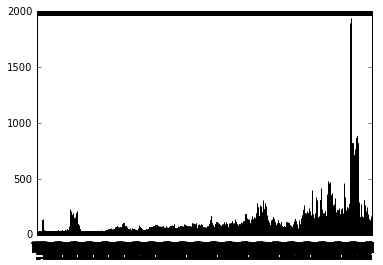

In [19]:
media=sinfaltantes.mean(axis=1)
#Gráfico tipo barra
import matplotlib
%matplotlib inline
media.plot(kind='bar')

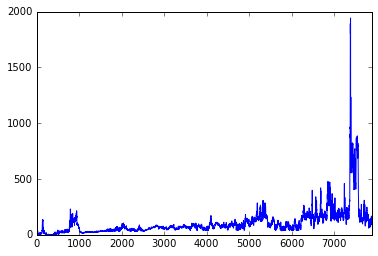

In [23]:
#Gráfico tipo linea
%matplotlib inline
media.plot(kind='line', use_index=False)

**6.--** Compute y grafique el precio máximo por mes.

In [27]:
#todo.iloc[7,0] # iloc busca el renglon especifico , con una columna especifica
w=[]
for n in range(len(sinfaltantes)):
    w.append(str(sinfaltantes.iloc[n,0])[0:7])
sinfaltantes['key']=w

sinfaltantes['max']=sinfaltantes.max(axis=1)
a=sinfaltantes.groupby('key').max()['max']

C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


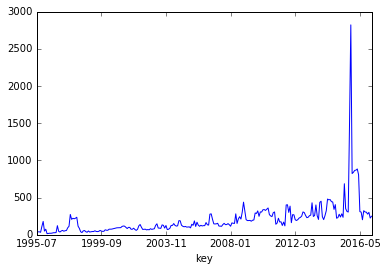

In [28]:
%matplotlib inline
a.plot(kind='line')

**7.--** Compute y grafique el precio mínimo mensual.

C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


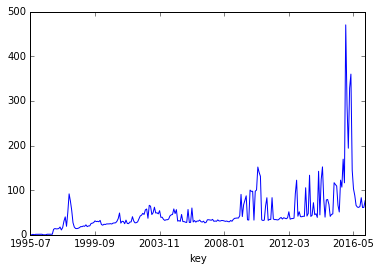

In [29]:
sinfaltantes['min']=sinfaltantes.min(axis=1)
b=sinfaltantes.groupby('key').min()['min']
%matplotlib inline
b.plot(kind='line')

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

In [30]:
#para calcular el promedio mensual
sinduplicados=todo.drop_duplicates(subset=['Fecha'])
sinfaltantes=sinduplicados.dropna()
sinfaltantes['media']=sinfaltantes.mean(axis=1)

w=[]
for n in range(len(sinfaltantes)):
    w.append(str(sinfaltantes.iloc[n,0])[0:7])
sinfaltantes['key']=w

c=sinfaltantes.groupby('key').mean()['media']

C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


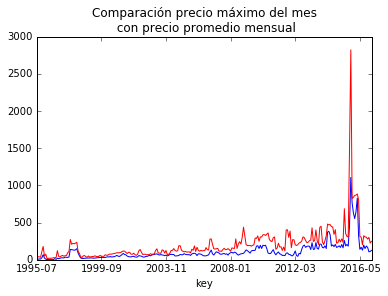

In [31]:
import matplotlib.pyplot as plt
plt.title('Comparación precio máximo del mes\n con precio promedio mensual')
c.plot(kind='line',color='blue')
plt.hold(True)
a.plot(kind='line',color='red')

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [32]:
#eliminar duplicados y archivos cuya fecha sea nula
sinfechanula=todo.dropna(subset=['Fecha'])
sinduplicados=sinfechanula.drop_duplicates(subset=['Fecha'])

#crear la columna tipodias
dias=['L','L','S','D','L','L','L']*int(len(sinduplicados)/7)+['L','L','S','D']
sinduplicados['tipodia']=dias

#Dejar solo los días laborales
sinfecha=sinduplicados.drop('Fecha',1)
sinsabados=sinfecha[sinfecha.tipodia != 'S']
sololaborales=sinsabados[sinsabados.tipodia !='D']

#Eliminar los registros nulos 
sololaborales=sololaborales.dropna()

#Resetiar los indices y quitar la columnas tipodia para tener solo valores numéricos
x=sololaborales.drop('tipodia',1)
x = x.reset_index()
del x['index']

#Obtener la posicón en que ocurre el maximo en cada día
conteo=[]
for i in range(len(x)):
    enumerate(x.ix[i])
    for j, e, in enumerate(x.ix[i]):
        if e ==(x.ix[i].max()):
            conteo.append(j)        

C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


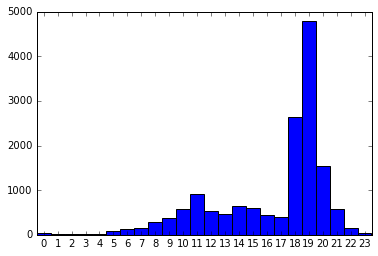

In [34]:
#gráfico

#Realizar el conteo de posiciones
conteo.sort()
c=[]
for x in range(0,24):
    c.append(conteo.count(x))

#Generar valores para el eje x
ejex=[]
for x in range(0,24):
    ejex.append(x)

#Gráfico
import numpy as np
import matplotlib.pyplot as plt

frequencies = c
pos = np.arange(len(ejex))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(ejex)

plt.bar(pos, frequencies, width, color='b')
plt.show()

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

In [35]:
sindomingos=sinfecha[sinfecha.tipodia != 'D']
solosabados=sindomingos[sindomingos.tipodia !='L']
solosabados.head()

#Eliminar los registros nulos 
solosabados=solosabados.dropna()

x=solosabados.drop('tipodia',1)
x = x.reset_index()
del x['index']

#Obtener la posicón en que ocurre el maximo en cada día
conteo=[]
for i in range(len(x)):
    enumerate(x.ix[i])
    for j, e, in enumerate(x.ix[i]):
        if e ==(x.ix[i].max()):
            conteo.append(j)   


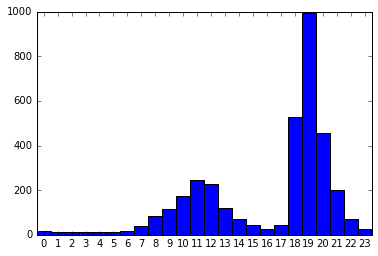

In [36]:
#gráfico

#Realizar el conteo de posiciones
conteo.sort()
c=[]
for x in range(0,24):
    c.append(conteo.count(x))

#Generar valores para el eje x
ejex=[]
for x in range(0,24):
    ejex.append(x)

#Gráfico
import numpy as np
import matplotlib.pyplot as plt

frequencies = c
pos = np.arange(len(ejex))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(ejex)

plt.bar(pos, frequencies, width, color='b')
plt.show()

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

In [37]:
sinsabados=sinfecha[sinfecha.tipodia != 'S']
solodomingos=sinsabados[sinsabados.tipodia !='L']

#Eliminar los registros nulos 
solodomingos=solodomingos.dropna()

x=solodomingos.drop('tipodia',1)
x = x.reset_index()
del x['index']

#Obtener la posicón en que ocurre el maximo en cada día
conteo=[]
for i in range(len(x)):
    enumerate(x.ix[i])
    for j, e, in enumerate(x.ix[i]):
        if e ==(x.ix[i].max()):
            conteo.append(j)   


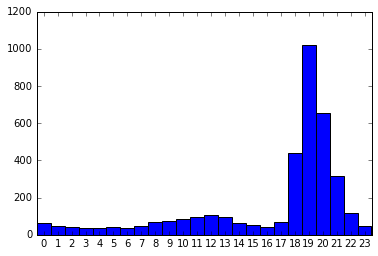

In [38]:
#gráfico

#Realizar el conteo de posiciones
conteo.sort()
c=[]
for x in range(0,24):
    c.append(conteo.count(x))

#Generar valores para el eje x
ejex=[]
for x in range(0,24):
    ejex.append(x)

#Gráfico
import numpy as np
import matplotlib.pyplot as plt

frequencies = c
pos = np.arange(len(ejex))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(ejex)

plt.bar(pos, frequencies, width, color='b')
plt.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [39]:
sinduplicados=todo.drop_duplicates(subset=['Fecha'])
sinfaltantes=sinduplicados.dropna()
sinfaltantes['minimo']=sinfaltantes.min(axis=1)

w=[]
for n in range(len(sinfaltantes)):
    w.append(str(sinfaltantes.iloc[n,0])[0:4])
sinfaltantes['key']=w
sinfaltantes.head()
c=sinfaltantes.groupby('key').min()['minimo']
c = c.reset_index()
bajoaño= pd.merge(sinfaltantes,c)
bajoaño[['key','Fecha','minimo']]

C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,key,Fecha,minimo
0,1995,1995-07-26,0.000000
1,1995,1995-07-28,0.000000
2,1995,1995-07-29,0.000000
3,1995,1995-07-30,0.000000
4,1995,1995-07-31,0.000000
5,1995,1995-08-01,0.000000
6,1995,1995-10-13,0.000000
7,1996,1996-05-10 00:00:00,0.000000
8,1996,1996-06-30 00:00:00,0.000000
9,1996,1996-07-04 00:00:00,0.000000


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [40]:
sinduplicados=todo.drop_duplicates(subset=['Fecha'])
sinfaltantes=sinduplicados.dropna()
mediadiaria=sinfaltantes.mean(axis=1) #promedio diario

sinfaltantes['media']=sinfaltantes.mean(axis=1)
w=[]
for n in range(len(sinfaltantes)):
    w.append(str(sinfaltantes.iloc[n,0])[0:7])
sinfaltantes['key']=w

c=sinfaltantes.groupby('key').mean()['media'] #promedio mensual



C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\egome\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


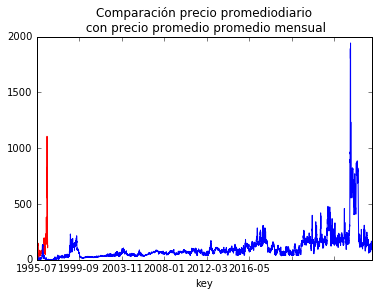

In [41]:
import matplotlib.pyplot as plt
plt.title('Comparación precio promediodiario\n con precio promedio promedio mensual')
c.plot(kind='line',color='red')
plt.hold(True)
mediadiaria.plot(kind='line',use_index=False)

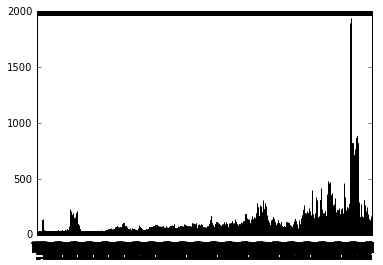

In [10]:
#Gráfico tipo barra para el promedio diario
%matplotlib inline
mediadiaria.plot(kind='bar')

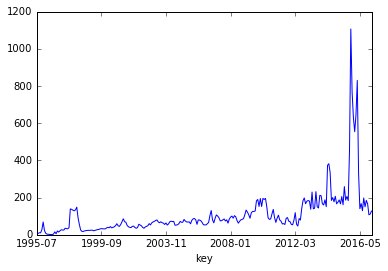

In [12]:
#Gráfico para el promedio mensual
%matplotlib inline
c.plot(kind='line',color='blue')

---